In [59]:
import sys
sys.path.append('../src')

from utils import plot_price, display_missing_values
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [ ]:
sns.set_theme(style="whitegrid")
plt.rcParams["figure.figsize"] = (12,6)

In [61]:
data_path = "../data/raw/btc_data.csv"   # Change filename accordingly
df = pd.read_csv(data_path)

In [62]:
print("Shape of dataset:", df.shape)
print("\nFirst few rows:")
display(df.head())

Shape of dataset: (4748, 7)

First few rows:


,Date,Price,Open,High,Low,Vol.,Change %
0,03/31/2025,"82,548.8","82,375.4","83,895.6","81,300.1",61.76K,0.22%
1,03/30/2025,"82,371.6","82,646.8","83,532.9","81,593.2",35.37K,-0.33%
2,03/29/2025,"82,645.7","84,412.1","84,603.4","81,668.2",39.34K,-2.09%
3,03/28/2025,"84,410.4","87,209.5","87,507.5","83,596.7",85.25K,-3.23%
4,03/27/2025,"87,228.2","86,937.0","87,751.4","85,844.4",56.49K,0.36%


In [63]:
print("\nDataset Info:")
print(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4748 entries, 0 to 4747
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      4748 non-null   object
 1   Price     4748 non-null   object
 2   Open      4748 non-null   object
 3   High      4748 non-null   object
 4   Low       4748 non-null   object
 5   Vol.      4748 non-null   object
 6   Change %  4748 non-null   object
dtypes: object(7)
memory usage: 259.8+ KB
None


In [64]:
print("\nMissing values:")
print(df.isnull().sum())


Missing values:
Date        0
Price       0
Open        0
High        0
Low         0
Vol.        0
Change %    0
dtype: int64


In [65]:
# --- Cleaning ---

# Remove commas in numbers (like "82,548.8")
for col in ['Price', 'Open', 'High', 'Low']:
    df[col] = df[col].str.replace(',', '')
    df[col] = df[col].astype(float)

# Handle Volume (K, M, B)
def convert_volume(val):
    if isinstance(val, str):
        if 'K' in val:
            return float(val.replace('K', '').replace(',', '')) * 1e3
        elif 'M' in val:
            return float(val.replace('M', '').replace(',', '')) * 1e6
        elif 'B' in val:
            return float(val.replace('B', '').replace(',', '')) * 1e9
        else:
            return float(val.replace(',', ''))
    return val

df['Vol.'] = df['Vol.'].apply(convert_volume)

# Remove '%' from 'Change %' and convert to float
df['Change %'] = df['Change %'].str.replace('%', '')
df['Change %'] = df['Change %'].astype(float)

# Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Sort by date ascending
df = df.sort_values('Date')
df.head()

,Date,Price,Open,High,Low,Vol.,Change %
4747,2012-04-01,4.8,4.9,4.9,4.7,35950.0,-1.63
4746,2012-04-02,5.0,4.8,5.1,4.8,80660.0,2.90
4745,2012-04-03,4.9,5.0,5.0,4.8,78480.0,0.00
4744,2012-04-04,4.9,4.9,5.0,4.9,51040.0,0.00
4743,2012-04-05,4.9,4.9,4.9,4.9,33810.0,0.00


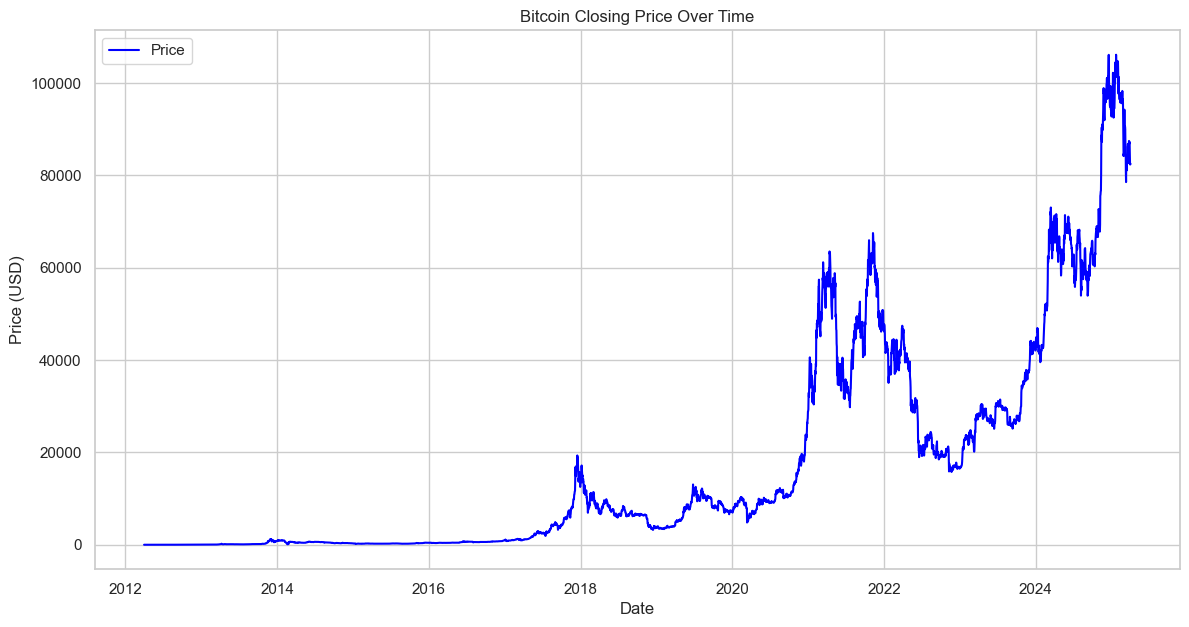

In [66]:
plot_price(df)

In [67]:
processed_data_path = "../data/processed/btc_clean.csv"
df.to_csv("../data/processed/btc_clean.csv", index=False)

print("✅ Data cleaned and saved!")

✅ Data cleaned and saved!
